In [1]:
# setup xelatex
!export PATH=/Library/TeX/texbin/xelatex:$PATH

# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# model trainings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, accuracy_score

# Set visualization styles for better aesthetics
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Optional: Configure matplotlib for inline display in Jupyter Notebook
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('dataset/CustomerAttrition.csv')

# Display the first few rows to verify
df.head()
balanced_data = False

In [3]:
# Get the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Get information about data types and missing values
df.info()

The dataset contains 10127 rows and 23 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                          

In [4]:
# Drop unnecessary columns
columns_to_drop = ['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
# Summary statistics for numerical columns
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n")
print(missing_values)

Missing Values in Each Column:

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


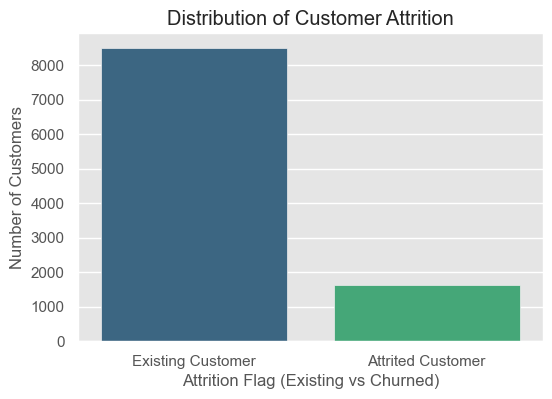

In [7]:
# Count plot for Attrition_Flag
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition_Flag', data=df, palette='viridis', hue='Attrition_Flag')
plt.title('Distribution of Customer Attrition')
plt.xlabel('Attrition Flag (Existing vs Churned)')
plt.ylabel('Number of Customers')
plt.show()

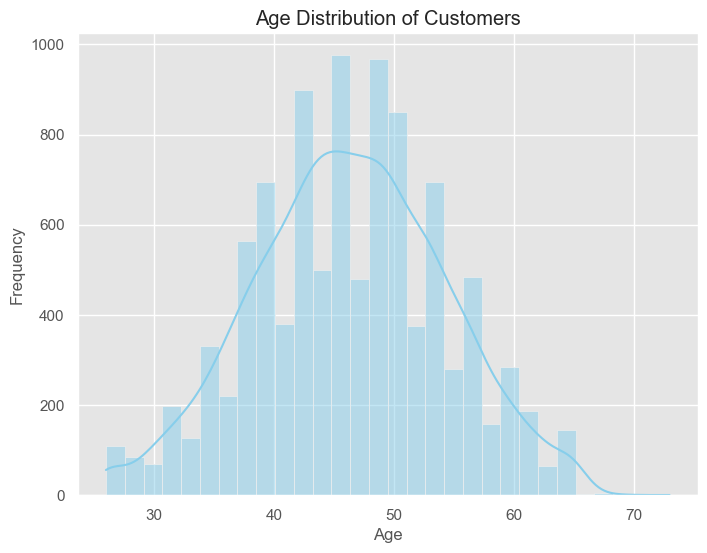

In [8]:
# Histogram for Customer_Age
plt.figure(figsize=(8,6))
sns.histplot(df['Customer_Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

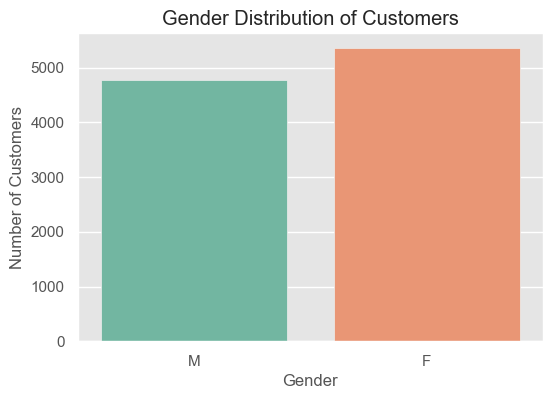

In [9]:
# Count plot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2', hue='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

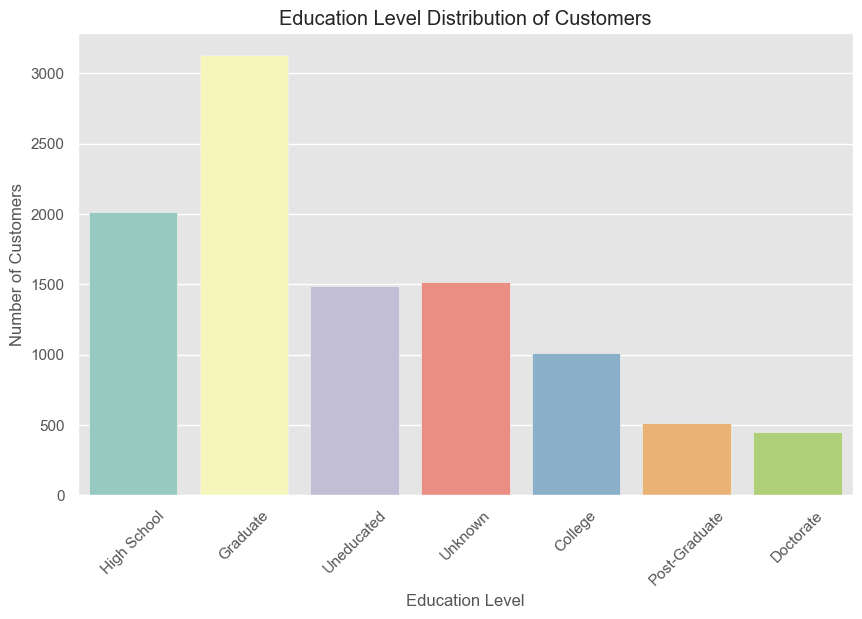

In [10]:
# Count plot for Education_Level
plt.figure(figsize=(10,6))
sns.countplot(x='Education_Level', data=df, palette='Set3', hue='Education_Level')
plt.title('Education Level Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

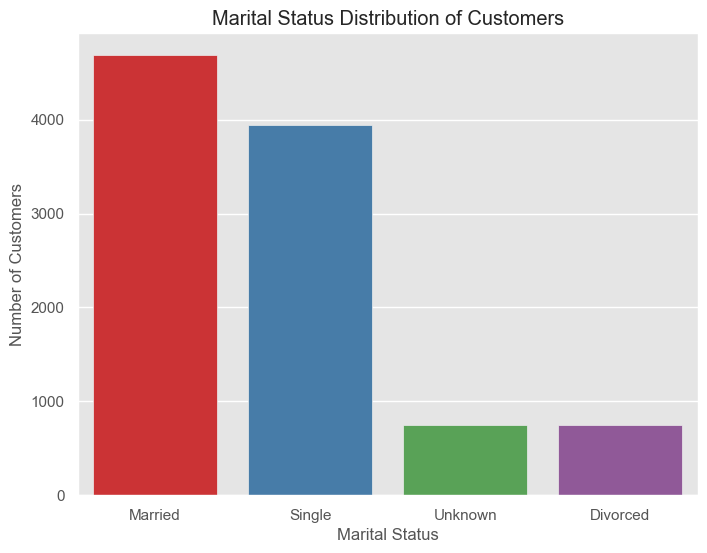

In [11]:
# Count plot for Marital_Status
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_Status', data=df, palette='Set1', hue='Marital_Status')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

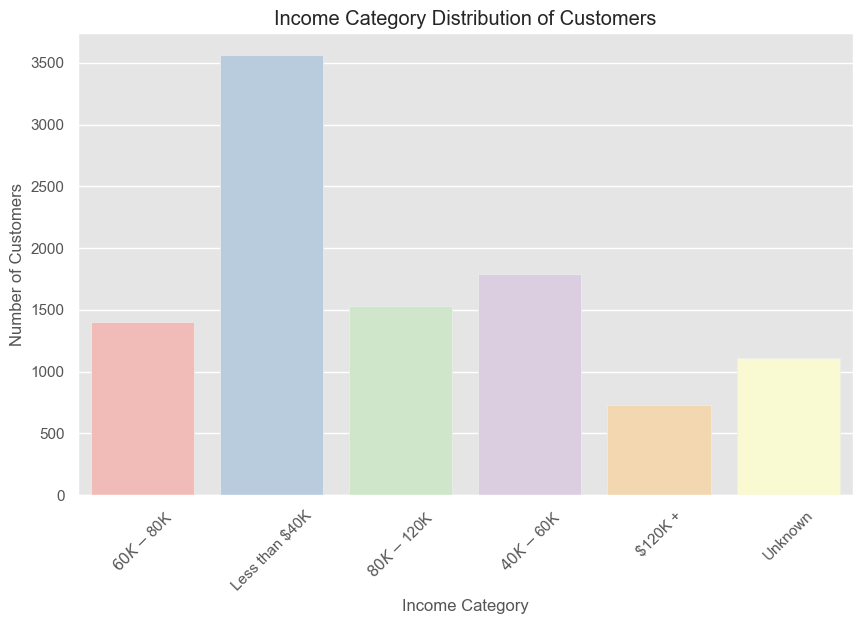

In [12]:
# Count plot for Income_Category
plt.figure(figsize=(10,6))
sns.countplot(x='Income_Category', data=df, palette='Pastel1', hue='Income_Category')
plt.title('Income Category Distribution of Customers')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

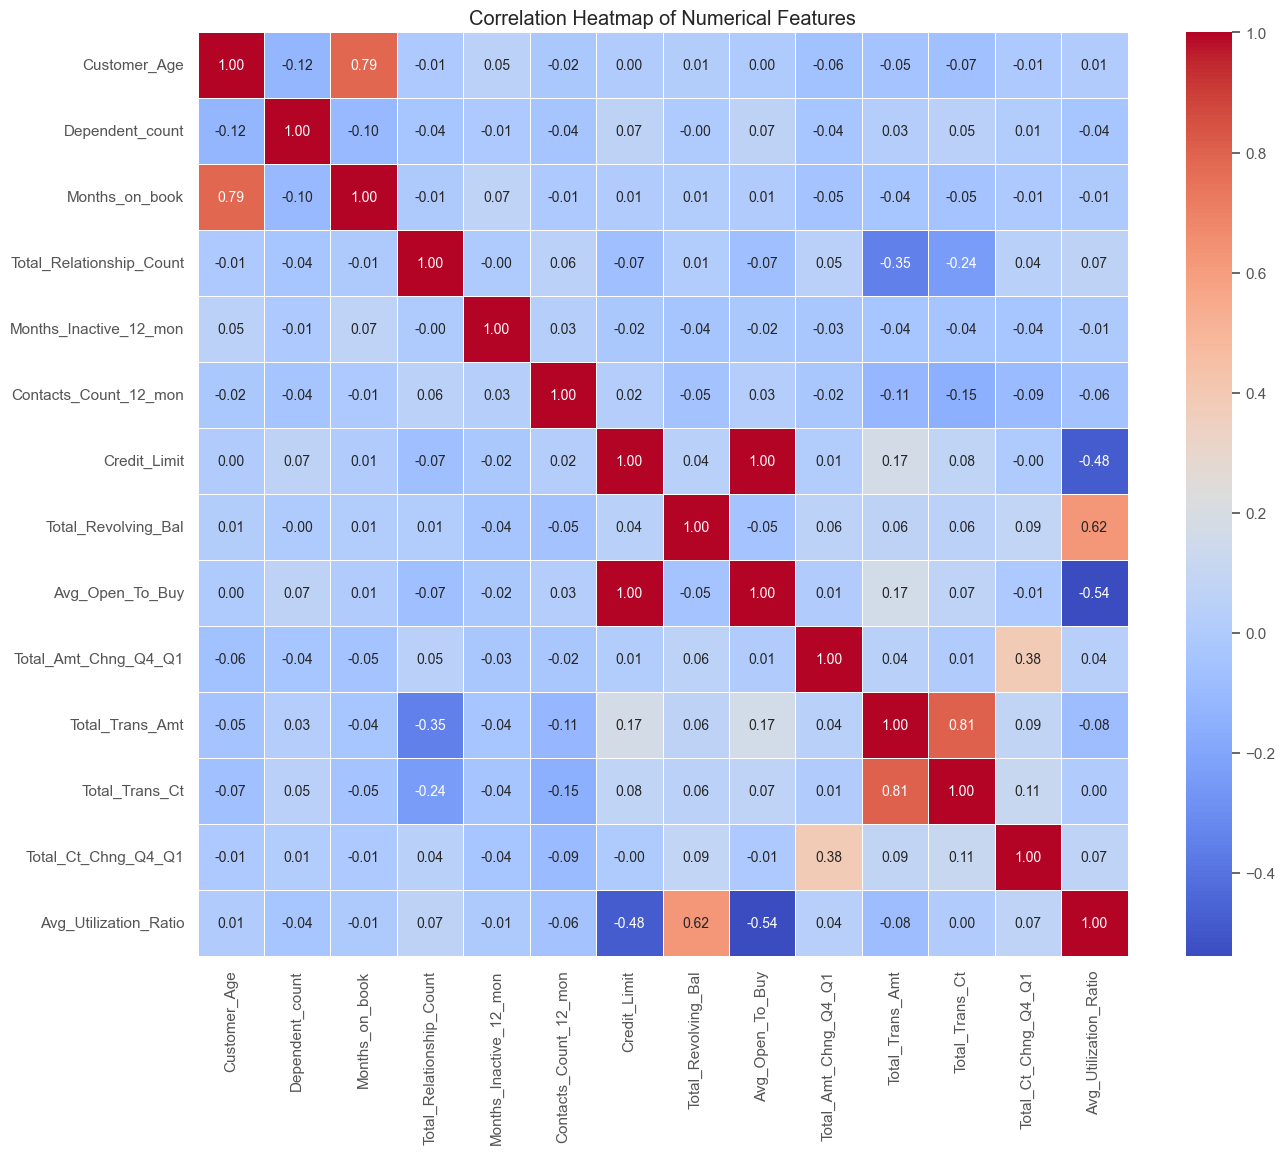

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Correlation matrix
# Plot the correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [14]:
# # Pairplot for selected features
# selected_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
#                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
#                     'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#                     'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']
# sns.pairplot(df[selected_features], hue='Attrition_Flag', palette='Set2', diag_kind='kde')
# plt.suptitle('Pairplot of Selected Features', y=1.02)
# plt.show()

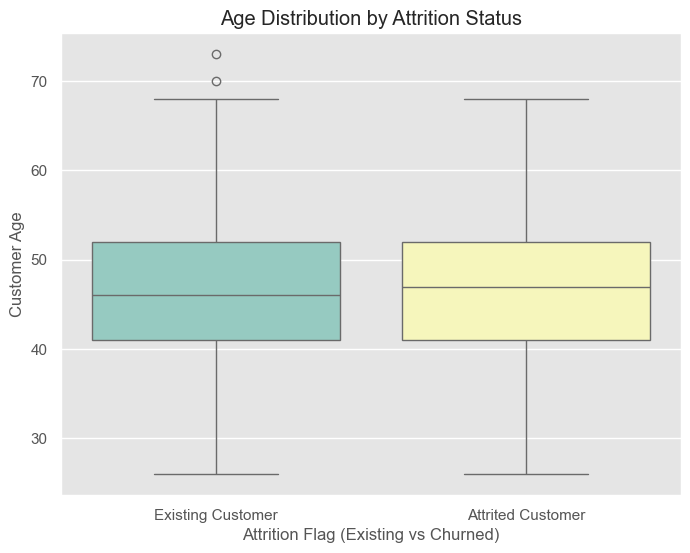

In [15]:
# Boxplot for Customer_Age by Attrition_Flag
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df, palette='Set3', hue='Attrition_Flag')
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition Flag (Existing vs Churned)')
plt.ylabel('Customer Age')
plt.show()

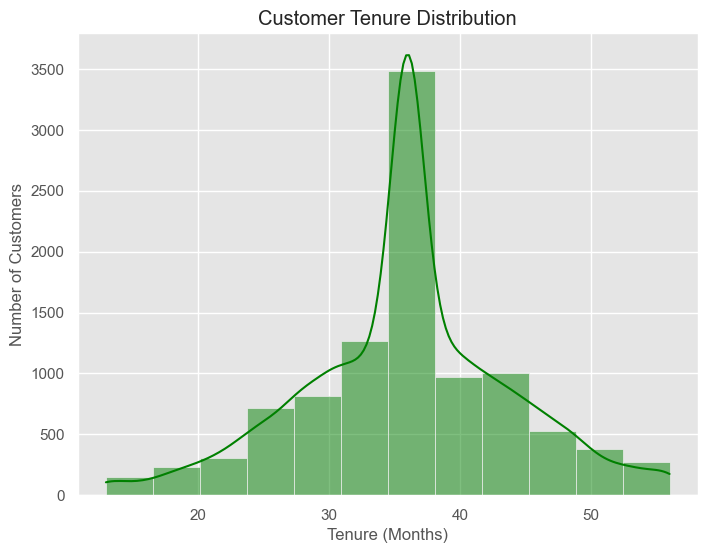

In [16]:
# Histogram for Months_on_book
plt.figure(figsize=(8,6))
sns.histplot(df['Months_on_book'], bins=12, kde=True, color='green')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

In [17]:
# Encode categorical columns
label_encoder = LabelEncoder()

categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# By default, the churned customers get a value of 0. Instead, we need the positive class (1) to represent the churned customers.
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 0 else 0)

In [18]:
# Scale numeric features
numeric_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                   'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                   'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [19]:
# Split the data into training and testing sets
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the first few rows of the processed data for verification
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,0,-0.789126,0,1.273283,3,3,4,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,0,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [20]:
print("Before rebalaning: \n", y_train.value_counts())

# Try rebalancing the classes to improve results

from imblearn.over_sampling import SMOTE

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

balanced_data = True

print("\n\nAfter rebalaning: \n", y_resampled.value_counts())

Before rebalaning: 
 Attrition_Flag
0    5957
1    1131
Name: count, dtype: int64


After rebalaning: 
 Attrition_Flag
0    5957
1    5957
Name: count, dtype: int64


In [21]:
if (not balanced_data):
    X_resampled = X_train
    y_resampled = y_train

In [22]:
from interpret.glassbox import LogisticRegression as InterpretLogisticRegression, ClassificationTree, ExplainableBoostingClassifier

# Initialize and train InterpretML's Logistic Regression model
# interpret_logistic = InterpretLogisticRegression(random_state=42, max_iter=10000)
interpret_logistic = InterpretLogisticRegression(random_state=42, tol=1e-2, max_iter=10000) # with custom tolerance
interpret_logistic.fit(X_resampled, y_resampled)
# interpret_logistic.fit(X_train, y_train) # without SMOTE


# Make predictions on the test set
y_pred_logistic_interpret = interpret_logistic.predict(X_test)

# Evaluate the model
labels = [0, 1]
conf_matrix_logistic_interpret = confusion_matrix(y_test, y_pred_logistic_interpret, labels=labels)
classification_rep_logistic_interpret = classification_report(y_test, y_pred_logistic_interpret)

print(conf_matrix_logistic_interpret)
print(classification_rep_logistic_interpret)

[[2195  348]
 [  93  403]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2543
           1       0.54      0.81      0.65       496

    accuracy                           0.85      3039
   macro avg       0.75      0.84      0.78      3039
weighted avg       0.89      0.85      0.87      3039



<!-- http://127.0.0.1:7637/4933661568/ -->

<!-- http://127.0.0.1:7637/4937082464/ -->

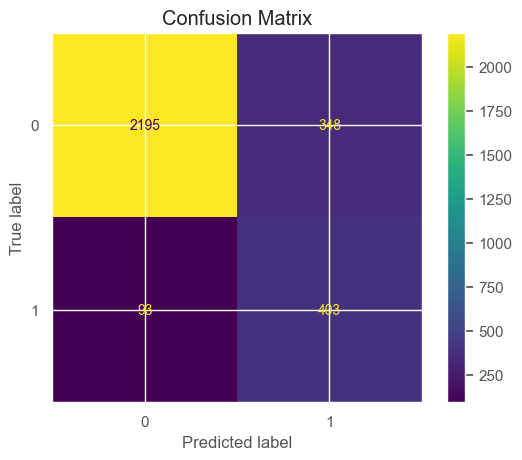

In [23]:
from interpret import show
from interpret.perf import ROC, PR

# Visualize Feature Importance (Local)
interpret_logistic_local = interpret_logistic.explain_local(X_test[:100], y_test[:100], name='Logistic Regression (Local Interpretation)')
show(interpret_logistic_local)

# Visualize Feature Importance (Global)
interpret_logistic_global = interpret_logistic.explain_global(name='Logistic Regression (Global Interpretation)')
show(interpret_logistic_global)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic_interpret)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Fit decision tree model
tree = ClassificationTree()
tree.fit(X_resampled, y_resampled)
print("Training finished.")
y_pred_decision_tree_interpret = tree.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred_decision_tree_interpret, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred_decision_tree_interpret)}")

# Evaluate the model
labels = [0, 1]
conf_matrix_decision_tree_interpret = confusion_matrix(y_test, y_pred_decision_tree_interpret, labels=labels)
classification_rep_decision_tree_interpret = classification_report(y_test, y_pred_decision_tree_interpret)
    
print(conf_matrix_decision_tree_interpret)
print(classification_rep_decision_tree_interpret)

# Explain locally
tree_local = tree.explain_local(X_test[:100], y_test[:100], name='Tree (Local)')
show(tree_local)

# Explain globally
tree_global = tree.explain_global(name='Tree (Global)')
show(tree_global)

Training finished.
F1 Score 0.8347181498761305
Accuracy 0.9068772622573215
[[2382  161]
 [ 122  374]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2543
           1       0.70      0.75      0.73       496

    accuracy                           0.91      3039
   macro avg       0.83      0.85      0.83      3039
weighted avg       0.91      0.91      0.91      3039



<!-- http://127.0.0.1:7637/4935745120/ -->

<!-- http://127.0.0.1:7637/4958309216/ -->

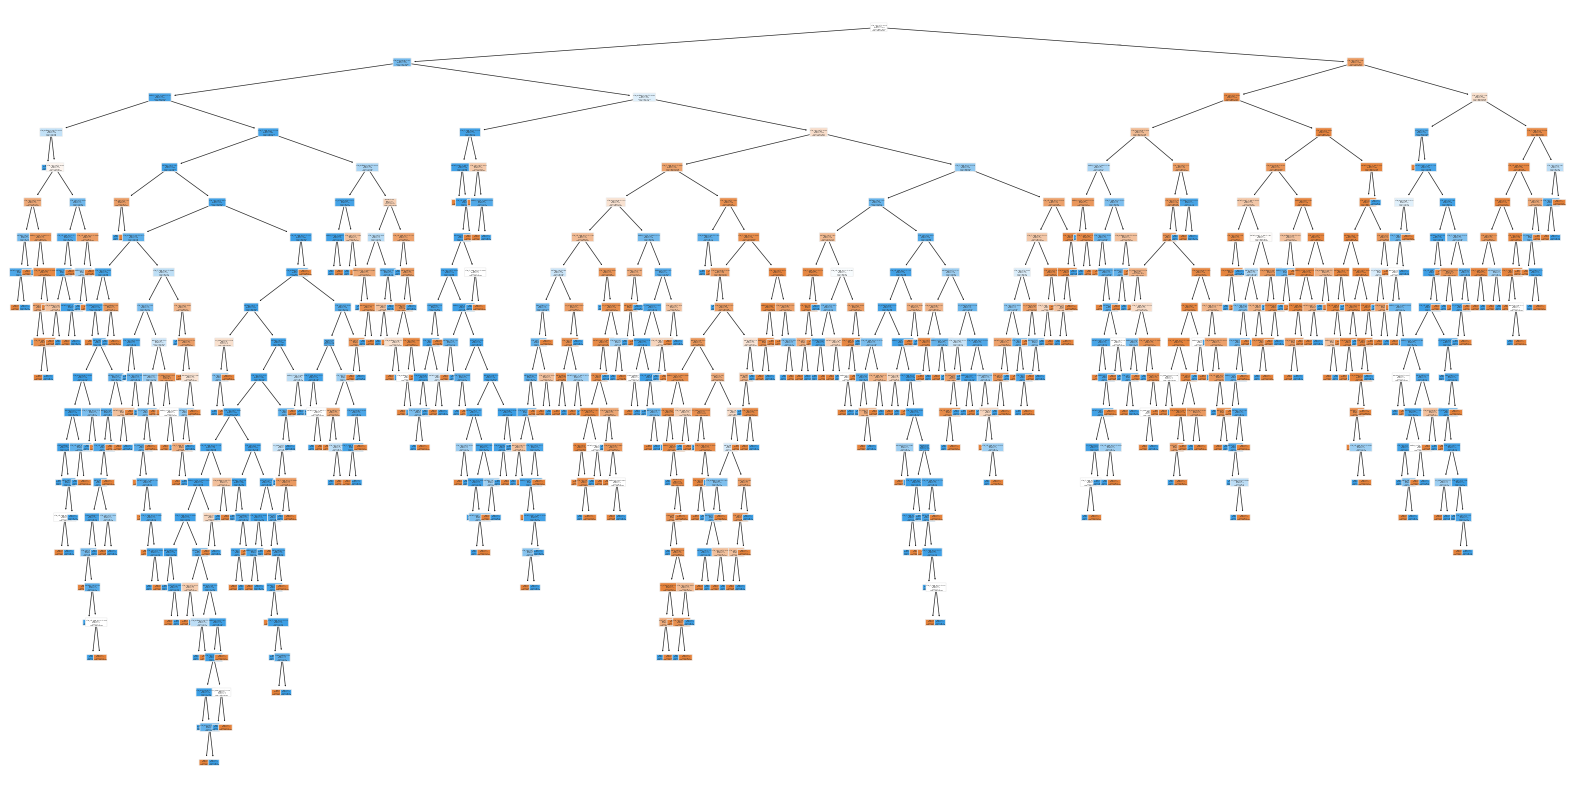

True

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

# Assuming your model is already fitted to X_train and y_train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_resampled, y_resampled)

# Plot the tree with detailed information
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_resampled.columns, class_names=["Not Churned", "Churned"], rounded=True)
plt.show()

from IPython.display import Image
import pydotplus

dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=X_resampled.columns,  
                           class_names=["Not Churned", "Churned"],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
graph.write_pdf("tree_visualization.pdf")

In [26]:
# Fit Explainable Boosting Machine
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_resampled, y_resampled) 
print("Training finished.")
y_pred_ebm_interpret = ebm.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred_ebm_interpret, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred_ebm_interpret)}")

# Evaluate the model
labels = [0, 1]
conf_matrix_ebm = confusion_matrix(y_test, y_pred_ebm_interpret, labels=labels)
classification_rep_ebm = classification_report(y_test, y_pred_ebm_interpret)

print(conf_matrix_ebm)
print(classification_rep_ebm)

# Explain locally
ebm_local = ebm.explain_local(X_test[:100], y_test[:100], name='EBM (Local)')
show(ebm_local)

# Explain globally
ebm_global = ebm.explain_global(name='EBM (Global)')
show(ebm_global)

Training finished.
F1 Score 0.9444039674522562
Accuracy 0.9697268838433696
[[2499   44]
 [  48  448]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.90      0.91       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



<!-- http://127.0.0.1:7637/4963247136/ -->

<!-- http://127.0.0.1:7637/6112814064/ -->

In [27]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
y_pred_random_forest_sklearn = rf.predict(X_test)

conf_matrix_random_forest_sklearn = confusion_matrix(y_test, y_pred_random_forest_sklearn)
classification_rep_random_forest_sklearn = classification_report(y_test, y_pred_random_forest_sklearn)

print(f"F1 Score {f1_score(y_test, y_pred_random_forest_sklearn, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred_random_forest_sklearn)}")
print(conf_matrix_random_forest_sklearn)
print(classification_rep_random_forest_sklearn)

F1 Score 0.9231495047486284
Accuracy 0.9578808818690359
[[2477   66]
 [  62  434]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2543
           1       0.87      0.88      0.87       496

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [28]:
# Use LIME for local interpretations
import lime
from interpret.blackbox import LimeTabular
lime = LimeTabular(model=rf,
                   data=X_resampled, 
                   random_state=42)
lime_local = lime.explain_local(X_test[:100], 
                                y_test[:100], 
                                name='LIME: Local Interpretations')

show(lime_local)

<!-- http://127.0.0.1:7637/4963514992/ -->

  0%|          | 0/100 [00:00<?, ?it/s]

(100, 19)


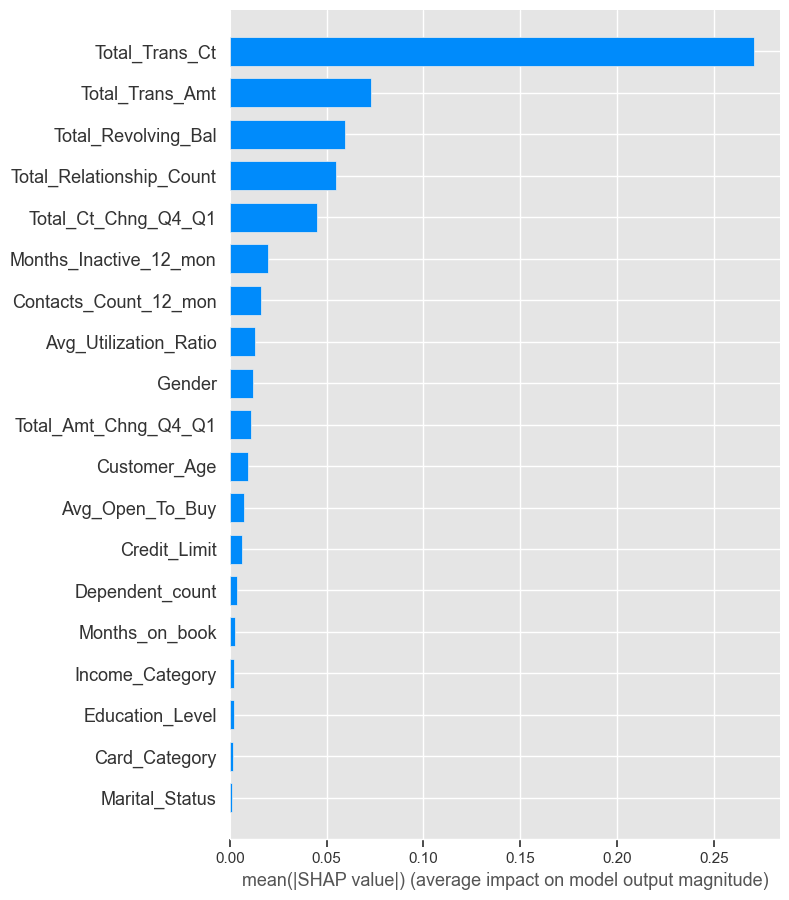

In [29]:
import shap, numpy as np, matplotlib.pyplot as plt

# explainer = shap.TreeExplainer(rf)
explainer = shap.KernelExplainer(rf.predict, X_resampled.sample(n=100, random_state=1))
shap_values = explainer.shap_values(X_test[:100])

print(shap_values.shape)

shap.initjs()
shap.summary_plot(shap_values, X_test[:100], plot_type="bar", feature_names=X_test.columns, show=False)

plt.show()
# plt.savefig('shap_summary_plot.png', bbox_inches='tight')
plt.close()